In [1]:
import pandas as pd
iris=pd.read_csv('D:/DSC/iris.csv', index_col=0)
iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [2]:
iris.shape

(150, 5)

In [3]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


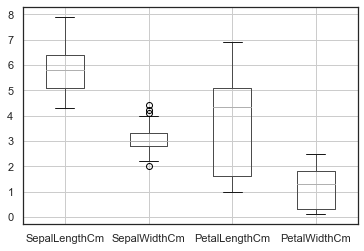

In [48]:
iris.boxplot(["SepalLengthCm","SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])


In [10]:
import numpy as np
from scipy import stats

z=np.abs(stats.zscore(iris._get_numeric_data()))
outlier = iris[(z < 3).all(axis = 1)]
print(outlier.shape)

(149, 5)


In [11]:
pd_outlier = pd.DataFrame([])
pd_outlier["Notes"]=["Not Outlier", "Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], iris.shape[0]-outlier.shape[0]]
pd_outlier

,Notes,Number of Observations
0,Not Outlier,149
1,Outlier,1


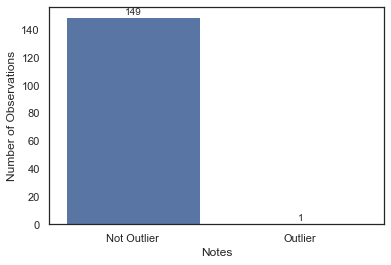

In [16]:
import seaborn as sns

sns.set(style = "white") #dark
plot =sns.barplot(x= "Notes", y = "Number of Observations", data = pd_outlier)

rects = plot.patches
labels= pd_outlier['Number of Observations']
for rect, label in zip (rects, labels):
    height = rect.get_height()
    plot.text(rect.get_x()+rect.get_width()/2, height+0.2, label, ha = 'center', va = 'bottom', fontsize=10)


In [20]:
from sklearn import preprocessing

features = iris.iloc[:,0:4]
features_normalized = preprocessing.normalize(features, norm='l2')
features_normalized = pd.DataFrame(features_normalized, columns = features.columns.tolist())
features_normalized

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


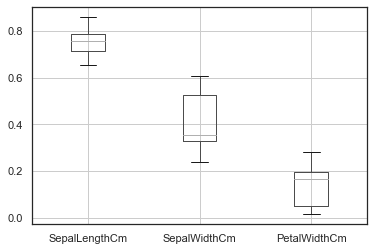

In [24]:
features_normalized.boxplot(["SepalLengthCm", "SepalWidthCm", "PetalWidthCm"])

In [26]:
z=np.abs(stats.zscore(features_normalized._get_numeric_data()))
outlier = features_normalized[(z < 3).all(axis = 1)]
print(outlier.shape)

(150, 4)


In [27]:
pd_outlier = pd.DataFrame([])
pd_outlier["Notes"]=["Not Outlier", "Outlier"]
pd_outlier["Number of Observations"] = [outlier.shape[0], features_normalized.shape[0]-outlier.shape[0]]
pd_outlier

,Notes,Number of Observations
0,Not Outlier,150
1,Outlier,0


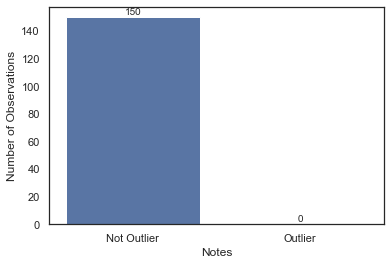

In [28]:
import seaborn as sns

sns.set(style = "white") #dark
plot =sns.barplot(x= "Notes", y = "Number of Observations", data = pd_outlier)

rects = plot.patches
labels= pd_outlier['Number of Observations']
for rect, label in zip (rects, labels):
    height = rect.get_height()
    plot.text(rect.get_x()+rect.get_width()/2, height+0.2, label, ha = 'center', va = 'bottom', fontsize=10)

In [39]:
from sklearn.model_selection import train_test_split

x= features_normalized
y = iris.iloc[:,-1]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=42) #random state = 42
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [42]:
x_train.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,0.775771,0.607125,0.168646,0.033729
15,0.773811,0.597328,0.203635,0.054303
65,0.769454,0.356016,0.505313,0.160782


In [43]:
y_train.head(3)

Id
23        Iris-setosa
16        Iris-setosa
66    Iris-versicolor
Name: Species, dtype: object

In [44]:
x_test.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,0.736599,0.338111,0.567543,0.144905
18,0.806828,0.537885,0.240633,0.042465
118,0.706006,0.238392,0.632655,0.210885


In [41]:
y_test.head(3)

Id
74     Iris-versicolor
19         Iris-setosa
119     Iris-virginica
Name: Species, dtype: object

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

model = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', p = 2)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

cm=confusion_matrix(y_predict, y_test)
accuracy = accuracy_score(y_predict, y_test)

print(cm)
print('\n')
print('The accuracy of the KNN is:', accuracy)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


The accuracy of the KNN is: 0.9666666666666667


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = KNeighborsClassifier()
scorer = make_scorer(accuracy_score, greater_is_better = True)
parameters = [{'n_neighbors': [3,5,7,9,11,13,15,17],
              'weights':['uniform', 'distance'],
              'p':[1,2]}]

model_gscv = GridSearchCV(model, param_grid = parameters, scoring = scorer, cv = 5)
model_gscv.fit(x,y)
print('Best Parameter:', model_gscv.best_params_)
print('Best Score    :', model_gscv.best_score_)

Best Parameter: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best Score    : 0.9800000000000001


In [46]:
cv_result = pd.DataFrame.from_dict(model_gscv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018791,0.022356,0.014998,0.016931,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
1,0.006225,0.007624,0.015639,0.024234,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
2,0.000000,0.000000,0.012495,0.011713,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
3,0.009372,0.007653,0.003131,0.006261,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
4,0.006242,0.007644,0.000000,0.000000,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",1.0,1.0,0.933333,0.900000,1.000000,0.966667,0.042164,25
5,0.003132,0.006263,0.009371,0.007651,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",1.0,1.0,0.933333,0.933333,1.000000,0.973333,0.032660,9
6,0.000000,0.000000,0.006249,0.007653,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
7,0.000000,0.000000,0.008168,0.007355,5,2,distance,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,1
8,0.004803,0.003922,0.006388,0.009320,7,1,uniform,"{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}",1.0,1.0,0.933333,0.900000,0.966667,0.960000,0.038873,30
9,0.001599,0.003197,0.013662,0.013628,7,1,distance,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}",1.0,1.0,0.933333,0.933333,1.000000,0.973333,0.032660,9
